In [4]:
!pip install tensorflow opencv-python matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_data = datagen.flow_from_directory(
    "dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False   # IMPORTANT for correct evaluation
)

print("Class indices:", train_data.class_indices)


Found 1680 images belonging to 3 classes.


Found 419 images belonging to 3 classes.
Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dense, Dropout, GlobalAveragePooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (128, 128)
batch_size = 32

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


c:\Users\DELL\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:

model.summary()
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,147 (430.26 KB)

 Trainable params: 110,147 (430.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 268ms/step - accuracy: 0.3940 - loss: 1.0849 - val_accuracy: 0.4773 - val_loss: 1.0305
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 261ms/step - accuracy: 0.4833 - loss: 1.0146 - val_accuracy: 0.4224 - val_loss: 1.0032
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step - accuracy: 0.5274 - loss: 0.9811 - val_accuracy: 0.6706 - val_loss: 0.9171
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.6512 - loss: 0.8632 - val_accuracy: 0.7279 - val_loss: 0.7527
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - accuracy: 0.7458 - loss: 0.6363 - val_accuracy: 0.7876 - val_loss: 0.5972
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.7685 - loss: 0.5740 - val_accuracy: 0.7900 - val_loss: 0.5451
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 271ms/step - accuracy: 0.7613 - loss: 0.5632 - val_accuracy: 0.7709 - val_loss: 0.5939
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 273ms/step - accuracy: 0.7732 - loss: 0.5518 - val_accu

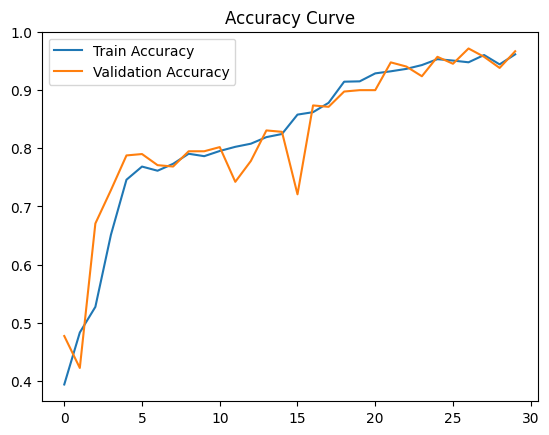

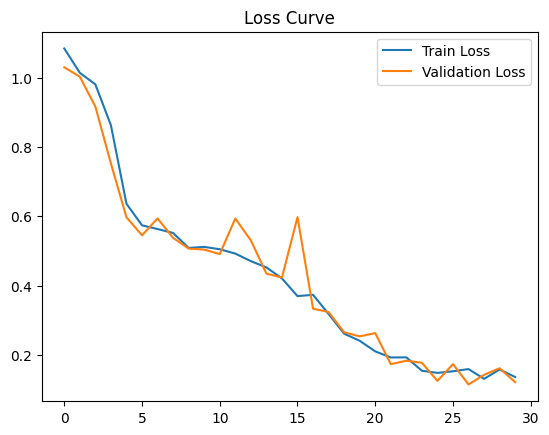

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step
              precision    recall  f1-score   support

       paper       0.97      0.96      0.96       142
        rock       0.95      0.97      0.96       145
    scissors       0.95      0.95      0.95       132

    accuracy                           0.96       419
   macro avg       0.96      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



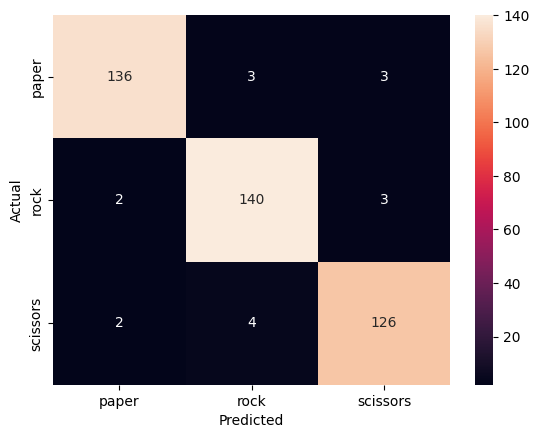

In [71]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

print(classification_report(y_true, y_pred, target_names=val_data.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=val_data.class_indices.keys(),
            yticklabels=val_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [73]:
from tensorflow.keras.preprocessing import image

def predict_gesture(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)

    return predicted_class, confidence

pred, conf = predict_gesture(r"C:\Users\DELL\OneDrive\Desktop\ROCK PAPER SCISSOR\pranav hand.jpeg")
print("Prediction:", pred)
print("Confidence:", conf)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: rock
Confidence: 0.97399896


In [74]:
train_gen = datagen.flow_from_directory(r"C:\Users\DELL\OneDrive\Desktop\ROCK PAPER SCISSOR\Dataset")
print(train_gen.class_indices)


Found 2099 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}
